In [1]:
import numpy as np
A = np.array([[7,2],[3,4],[5,3]])
U, D, V = np.linalg.svd(A)
print(U)
print(D)
print(V)

[[-0.69366543  0.59343205 -0.40824829]
 [-0.4427092  -0.79833696 -0.40824829]
 [-0.56818732 -0.10245245  0.81649658]]
[10.25142677  2.62835484]
[[-0.88033817 -0.47434662]
 [ 0.47434662 -0.88033817]]


<PIL.Image.Image image mode=L size=1280x1280 at 0xA7DC15EC>


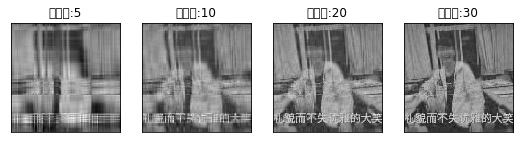

In [8]:

from PIL import Image
import matplotlib.pyplot as plt
from scipy.linalg import svd,eig,diagsvd,lu
import skimage
import numpy as np

img = Image.open('test_svd.jpg')
imggray = img.convert('L')#将图片转换成灰度图像
print(imggray)

#svd分解
u,s,vh = svd(imggray)


#用奇异值重构
num_of_singular = [5,10,20,30]
plt.figure(figsize=(9,6))
plt.title('A=U*S*Vh')
for index,i in enumerate(num_of_singular):
    reconstruct = np.dot(u[:,:i]*s[:i],vh[:i,:])
    plt.subplot(1,len(num_of_singular),index+1)
    plt.xticks([])
    plt.yticks([])
    plt.title("奇异值:{}".format(i))
    plt.imshow(reconstruct,cmap=plt.cm.gray)


plt.show()

In [9]:
for i in [5,10,15,20,30,50]:
    plt.style.use('classic')
    img = Image.open('test_svd.jpg')
    #将图片转换成灰度图像
    imggray = img.convert('L')
    #将图片转化为numpy数组
    imgmat = np.array(list(imggray.getdata(band=0)),float)
    
    U, D, V = np.linalg.svd(imgmat)
    reconstimg = np.matrix(U[:,:i])*np.diag(D[:i])*np.matrix(V[:i,:])
    plt.imshow(reconstimg,cmap='gray')
    title = "n =%s"%i
    plt.title(title)
    plt.show()

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional